# Sheet 04, groupname: JaMaMa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2
## a) Gradient descent with constant learning rate

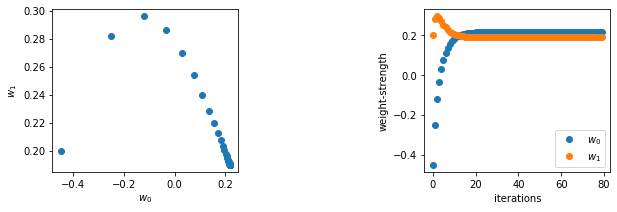

iterations:  78


In [2]:
stop_criterion = 1e-10

training_set = np.array(((-1, -0.1), (0.3,0.5), (2, 0.5)))
training_x = np.vstack((np.ones(3).T, training_set[:,0]))
training_y = training_set[:,1]
weights = np.array([-0.45,0.2])
hess_x = training_x @ training_x.T # matrix-multilication

def calc_grad(x=training_x, y_T=training_y, w=weights, hess=hess_x):
    return hess @ w - x @ y_T.T

eta = 0.1

def calc_w_new(w_old, eta):
    grad = calc_grad(w=w_old)
    return w_old - eta*grad

weights_new = weights
weights_old = weights_new + 1 

weights_all = [weights_new]

c = 0
while not np.linalg.norm(weights_old-weights_new) < stop_criterion and c < 1000:
    weights_old = weights_new
    weights_new = calc_w_new(weights_new, eta)
    weights_all.append(weights_new)
    c += 1
    #print(c)

def plot_weight_evol(wghts): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,3])
    fig.subplots_adjust(wspace=1)
    wghts = np.array(wghts)
    ax1.plot(wghts[:,0],wghts[:,1], 'o')
    ax1.set_xlabel('$w_0$')
    ax1.set_ylabel('$w_1$')

    ax2.plot(wghts[:,0],'o')
    ax2.plot(wghts[:,1], 'o')
    ax2.set_xlabel('iterations')
    ax2.set_ylabel('weight-strength')
    ax2.legend(('$w_0$', '$w_1$'))
    plt.show()

plot_weight_evol(weights_all)
print('iterations: ', c-1)

## b) linesearch

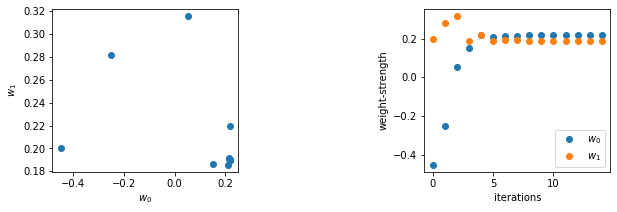

iterations:  13


In [3]:
eta = 0.1
weights_new = weights
weights_old = weights_new + 1 
weights_all = [weights_new]
c = 0

def calc_w_new(w_old, eta):
    grad = calc_grad(w=w_old)
    return (w_old - eta*grad, grad)

def calc_new_eta(g, hess):
    #print("(g.T @ hess @ g):", g.T @ hess @ g)
    return (g.T @ g)/(g.T @ hess @ g)

while not np.linalg.norm(weights_old-weights_new) < stop_criterion and c < 1000:
    weights_old = weights_new
    (weights_new, gradient) = calc_w_new(weights_new, eta)
    eta = calc_new_eta(gradient, hess_x) ### muss vorher ### erster gradient außerhalb berechnen
    weights_all.append(weights_new)
    c += 1 
    
plot_weight_evol(weights_all)

#print(weights_all.shape)
#print(weights_all[-1])
print('iterations: ', c-1)

## c) conjugate gradient method

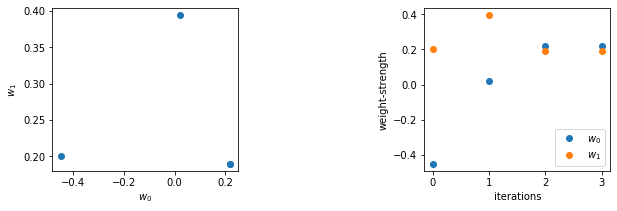

iterations:  2


In [4]:
def calc_new_eta_conjgrad(d, g, H):
    return - (d.T @ g) / (d.T @ H @ d)

def calc_beta(g_n, g):
    return - (g_n.T @ g_n) / (g.T @ g)

g_t = calc_grad(w=weights)
w_t = weights
d_t = -g_t
H = hess_x

eta_t = calc_new_eta_conjgrad(d_t, g_t, H)#0.1
weights_all = [w_t]
c = 0 
    
w_told = w_t+1
while not np.linalg.norm(w_told-w_t) < stop_criterion and c < 1000:
    w_told = w_t
    eta_t = calc_new_eta_conjgrad(d_t, g_t, H)
    
    w_tnew = w_t + eta_t * d_t
    weights_all.append(w_tnew)

    g_tnew = calc_grad(w=w_tnew)
    
    beta_t = calc_beta(g_tnew, g_t)
    
    d_tnew = g_tnew + beta_t * d_t
    
    g_t = g_tnew
    d_t = d_tnew
    w_t = w_tnew
    c += 1 
    
plot_weight_evol(weights_all)
print('iterations: ', c-1)

With all three methods the weights converge to the same weights (good, using the quadratic error as cost-function this is what we expect).
When comparing how many iterations were neccessary until the weights converged, one can clearly observe that the method using linesearch is already an improvement (13 iterations) compared to the method with constant learning rate (78 iterations). The conjugate gradient method converges fastest with 2 iterations, this matches the dimensionality of the problem with the two different weights and is the fastest convergence we can expect using this method. (In the way the stop-criterion was defined in this implementation, all loops had to run one more time to formulate the stop-criterion.) 